In [186]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as imges
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


Extract the current features and save into a different directory

20-07-22.JPG
26-7-22 dgra.JPG
26-7-22 dgra1.JPG
26-7-22 dgra2.JPG
26-7-22 dgra34.JPG
26-7-22.JPG
29-7-22.JPG
Lethabo 2.png
t.JPG
Tutuka 6 Shaft Earth.jpg
Tutuka 6 Shaft Earthing.jpg
Tutuka 6 strap2.jpg
Tutuka 6.JPG
tutukak.JPG


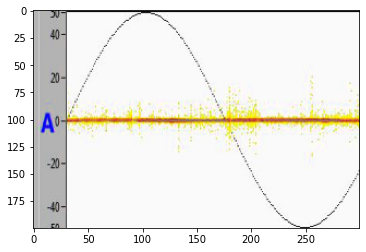

In [187]:
# get the path or directory
folder_dir = "ShaftEarthing/CurrentFault/"
imgs = []
i = 0
for images in os.listdir(folder_dir):
    i = i + 1
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".JPG")):
        # display
        print(images)
        img = im.imread('ShaftEarthing/CurrentFault/{}'.format(images))
        #print(img.shape[0])
        imge = img[int((img.shape[0]*0.635)):int((img.shape[0]*0.932)),int(((img.shape[1])*0.05)):int(((img.shape[1])*0.464)),:]
# Output img with window name as 'image'
        imge = cv2.resize(imge, (300, 200))
        if (images.endswith(".jpg") or images.endswith(".JPG")):
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
        else:
            imge = imge
        plt.imshow(imge)
        cv2.imwrite('ShaftEarthing/train/current/faulty/{}.png'.format(i), imge)
        imgs.append(imge)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Anort 1.png
Arnot 3.png
Camden 5.png
Kusile U1 25-10-2019.png
Lethabo 4.png
Lethabo 6.png
Lethabo 61.png
Lethabo 62.png
Lethabo U4.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Majuba 6.png
Matla 5.png
Medupi 1.png
Screenshot 2022-08-29 174540.png
Tutuka 6.png


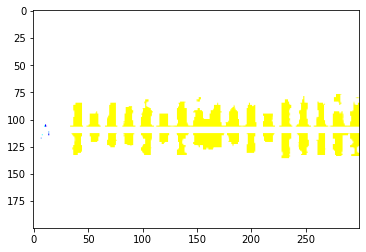

In [188]:
# get the path or directory
folder_dir = "ShaftEarthing/NormalCurrent/"
i = 0
for images in os.listdir(folder_dir):
    i = i + 1
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".JPG")):
        # display
        print(images)
        img = im.imread('ShaftEarthing/NormalCurrent/{}'.format(images))
        #print(img.shape[0])
        imge = img[int((img.shape[0]*0.635)):int((img.shape[0]*0.932)),int(((img.shape[1])*0.05)):int(((img.shape[1])*0.464)),:]
# Output img with window name as 'image'
        imge = cv2.resize(imge, (300, 200))
        if (images.endswith(".jpg") or images.endswith(".JPG")):
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
        else:
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
            imge = imge*255
        plt.imshow(imge)
        cv2.imwrite('ShaftEarthing/train/current/normal/{}.png'.format(i), imge)
        


Read and process training current data

In [189]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [190]:
train_data = train.flow_from_directory('ShaftEarthing/train/current',target_size=(300,200),class_mode= 'binary')
validation_data = validation.flow_from_directory('ShaftEarthing/validation/current',target_size=(300,200),class_mode= 'binary')

Found 29 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [191]:
train_data.class_indices

{'faulty': 0, 'normal': 1}

Model design and fitting

In [210]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(300,200,3)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation= 'relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation= 'relu'),
                    MaxPooling2D(2,2),
                    Conv2D(32,(3,3),activation= 'relu'),
                    MaxPooling2D(2,2),
                   Flatten(),
                   Dense(32,activation='relu'),
                   Dense(16,activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1,activation='sigmoid')])

In [211]:
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [212]:
fitted_model = model.fit(train_data,steps_per_epoch=1,epochs=50, validation_data = validation_data)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6961 - accuracy: 0.5172 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.6915 - accuracy: 0.4828 - val_loss: 0.7049 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.6883 - accuracy: 0.5172 - val_loss: 0.6700 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.6829 - accuracy: 0.5172 - val_loss: 0.7302 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.6826 - accuracy: 0.5172 - val_loss: 0.7540 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.6777 - accuracy: 0.5172 - val_loss: 0.6902 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.6624 - accuracy: 0.8621 - val_loss: 0.6638 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=============

In [156]:
image = imges.load_img('current.png',target_size=(300,200))
x = imges.img_to_array(image)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = fitted_model.predict(images)
print(val[0][0])


FileNotFoundError: [Errno 2] No such file or directory: 'current.png'

save the model to a json file

In [213]:
# serialize model to JSON
model_json = model.to_json()
with open("current_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("current_model.h5")
print("Saved model to disk")

Saved model to disk


Load back the mdel

In [214]:
# load json and create model
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("current_model.h5")
print("Loaded model from disk")

FileNotFoundError: [Errno 2] No such file or directory: 'model.json'

In [ ]:
image = imges.load_img('current.png',target_size=(300,200))
x = imges.img_to_array(image)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = fitted_model.predict(images)
print(val[0][0])